# Unsupervised Learning (K-Means Cluster)

#### In this task we are going to classify iris dataset based on their features. We will use K-Means clustering technique for classifying the dataset.

## Done by : Giridharan S

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

### Loading iris dataset from sklearn library

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Model Creation

In [9]:
from sklearn.cluster import KMeans

In KMeans algorithm, before training a model with have to find a best fit <b>K</b> value to train our model. For find it we have to follow trail and error basis for a range of numbers. The factor to a best fit K value is <b>Elbow curve</b>.

To plot an elbow curve we have to find the <b>Error Sum of Squares (SSE)</b>

In [10]:
sse=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters = i)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

In [11]:
sse

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.22847321428572,
 46.44618205128204,
 39.03998724608725,
 34.29822966507179,
 30.014398496240617,
 28.033437159074175,
 26.37817220727405]

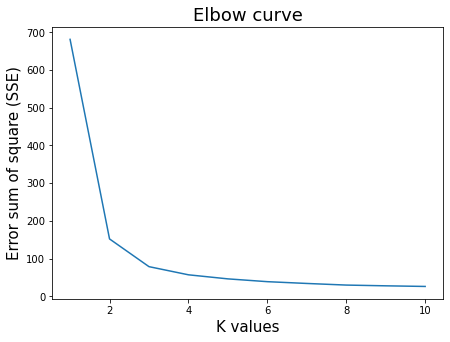

In [22]:
plt.figure(figsize=(7,5))
plt.plot(range(1,11),sse)
plt.title('Elbow curve',fontsize=18)
plt.xlabel('K values',fontsize=15)
plt.ylabel('Error sum of square (SSE)',fontsize=15)
plt.show()

The elbow forming point is the best fit of a K value. Therefore from the above elbow curve conclude that the best fit K value is <b>3</b>.

### Model Training and prediction

We are going to classify the dataset based on two features (petal length and petal width)

In [48]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(df[['petal length (cm)','petal width (cm)']])

In [49]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [50]:
df['prediction']=y_kmeans
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),prediction
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Splitting the dataset based on the classification

In [51]:
df1=df[df.prediction==0]
df2=df[df.prediction==1]
df3=df[df.prediction==2]

### Visualizing the clusters

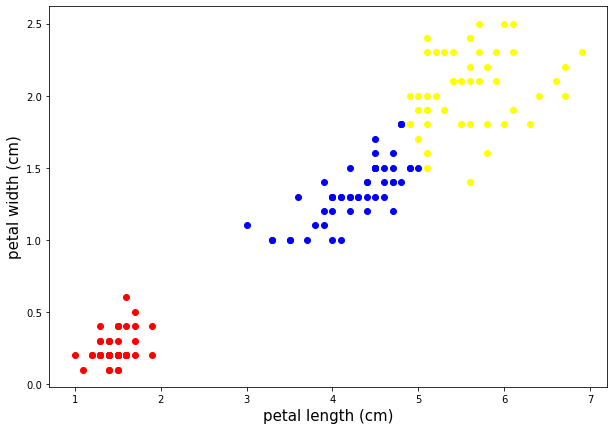

In [57]:
plt.figure(figsize=(10,7))
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='yellow')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='blue')
plt.xlabel('petal length (cm)',fontsize=15)
plt.ylabel('petal width (cm)',fontsize=15)
plt.show()

### Visualizing the clusters with their cluster centre

In [55]:
kmeans.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

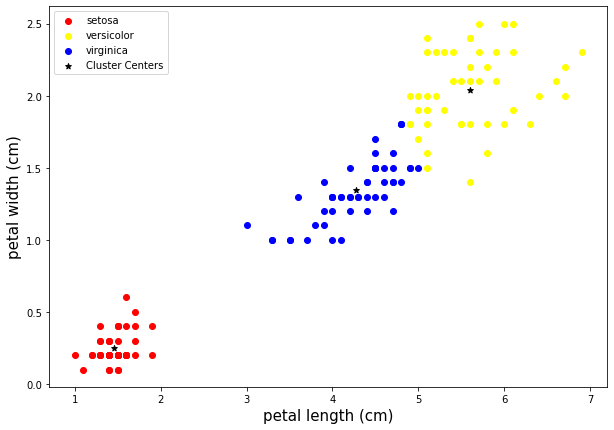

In [59]:
plt.figure(figsize=(10,7))
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red',label=iris.target_names[0])
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='yellow',label=iris.target_names[1])
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='blue',label=iris.target_names[2])
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='*',color='black',label='Cluster Centers')
plt.xlabel('petal length (cm)',fontsize=15)
plt.ylabel('petal width (cm)',fontsize=15)
plt.legend()
plt.show()